### Alternative model 4

Working on the variables.

Similar than model 3, but will use geometric mean to the definition of the amount of layers.

Similarly with model 3:

1) Recoding the *Income amount* ("INCOME_AMT") variable to numerical. For this I will:

    a) use the middle amount in the range as representative in the category
    
    b) for missing values, will apply the median of the known values recoded as in point a.
    
2) Dropping redundant columns of data. For that, I will use get_dummies and apply drop_first.



In [1]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import date

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.  


In [2]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv(
    Path('Resources/applicants_data.csv',)
)

# Review the DataFrame
applicant_data_df.head()


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Review the data types associated with the columns
applicant_data_df.dtypes


EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

### Step 2: Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.

In [4]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns=['EIN','NAME'])

# Review the DataFrame
applicant_data_df.head()


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


<AxesSubplot:>

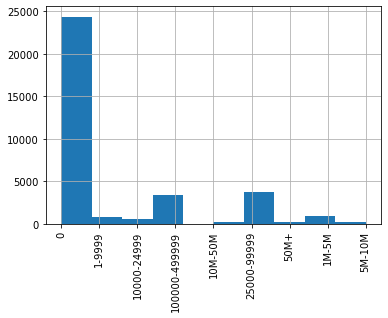

In [5]:
applicant_data_df['INCOME_AMT'].hist(xrot=90)


In [6]:
original_income_data_list=list(applicant_data_df['INCOME_AMT'].unique())
original_income_data_list

['0',
 '1-9999',
 '10000-24999',
 '100000-499999',
 '10M-50M',
 '25000-99999',
 '50M+',
 '1M-5M',
 '5M-10M']

In [7]:
# Recoding income
recode_list=[0,5000,17500,300000,30000000,62500,50000000,3000000,7500000]


In [8]:
#Recoding Income amount 
applicant_data_df_new=applicant_data_df['INCOME_AMT'].replace(original_income_data_list,recode_list)
median_income=applicant_data_df_new[applicant_data_df_new!=0].median()

In [9]:
applicant_data_df_new=applicant_data_df_new.replace(0,median_income)
applicant_data_df['INCOME_AMT']=applicant_data_df_new
applicant_data_df[['INCOME_AMT', 'ASK_AMT','IS_SUCCESSFUL']]

,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,62500,5000,1
1,5000,108590,1
2,62500,5000,0
3,17500,6692,1
4,300000,142590,1
...,...,...,...
34294,62500,5000,0
34295,62500,5000,0
34296,62500,5000,0
34297,62500,5000,1


### Step 3: Encode the dataset’s categorical variables into a new DataFrame.

In [10]:
# Create a list of categorical variables 
categorical_variables = list(applicant_data_df.dtypes[applicant_data_df.dtypes=='object'].index)

# Display the categorical variables list
categorical_variables


['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Encode the variables and drop redundant columns
encoded_df = pd.get_dummies(
    applicant_data_df[categorical_variables],
    drop_first=True
)
encoded_df.head()

,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,APPLICATION_TYPE_T3,...,CLASSIFICATION_C8200,CLASSIFICATION_C8210,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_Y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


### Step 4: Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

In [12]:
non_categorical_variables = list(applicant_data_df.dtypes[applicant_data_df.dtypes!='object'].index)
non_categorical_variables

['STATUS', 'INCOME_AMT', 'ASK_AMT', 'IS_SUCCESSFUL']

In [13]:
# Add the numerical variables from the original DataFrame to the get_dummies encoding DataFrame
encoded_df =pd.concat([applicant_data_df[non_categorical_variables], encoded_df], axis=1)

# Review the Dataframe
encoded_df.head()


,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,CLASSIFICATION_C8200,CLASSIFICATION_C8210,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_Y
0,1,62500,5000,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,5000,108590,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1,62500,5000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,17500,6692,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,300000,142590,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### Step 5: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 



In [14]:
# Define the target set y using the IS_SUCCESSFUL column
y = encoded_df['IS_SUCCESSFUL']

# Display a sample of y
y.head()


0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64

In [15]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = encoded_df.drop(columns=['IS_SUCCESSFUL'])

# Review the features DataFrame
X.head()


,STATUS,INCOME_AMT,ASK_AMT,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,CLASSIFICATION_C8200,CLASSIFICATION_C8210,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_Y
0,1,62500,5000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,5000,108590,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1,62500,5000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,17500,6692,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,300000,142590,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### Step 6: Split the features and target sets into training and testing datasets.


In [16]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X,y)


### Step 7: Use scikit-learn's `StandardScaler` to scale the features data.

In [17]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



* number of nodes of hidden layers by using aritmetic mean between previous layer (or input) and the output

In [18]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])


# Review the number of features
number_input_features

102

In [19]:
# Define the number of neurons in the output layer
number_output_neurons_A4 = 1

In [20]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A4 = np.ceil(np.sqrt(number_input_features * number_output_neurons_A4))

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A4

11.0

In [21]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer2_A4 = np.ceil(np.sqrt(hidden_nodes_layer1_A4 * number_output_neurons_A4))

# Review the number of hidden nodes in the first layer
hidden_nodes_layer2_A4

4.0

In [22]:
# Create the Sequential model instance
nn_A4 = Sequential()

In [23]:
# First hidden layer

nn_A4.add(
    Dense(
        units=hidden_nodes_layer1_A4,
        activation='relu',
        input_dim=number_input_features,
        use_bias=True
    )
)

#Second hidden layer
nn_A4.add(
    Dense(
        units=hidden_nodes_layer2_A4,
        activation='relu',
        use_bias=True
    )
)

# Output layer
nn_A4.add(
    Dense(
        units=1,
        activation='sigmoid'
    )
)


# Check the structure of the model
nn_A4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                1133      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 48        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 1,186
Trainable params: 1,186
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the Sequential model
nn_A4.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [25]:
# Fit the model using 50 epochs and the training data
epochs=50
fit_model_A4 = nn_A4.fit(
    X_train_scaled,
    y_train,
    epochs=epochs
)


Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.6570 - accuracy: 0.6543
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5950 - accuracy: 0.6966
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5828 - accuracy: 0.7038
Epoch 4/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5670 - accuracy: 0.7151
Epoch 5/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5609 - accuracy: 0.7204
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5592 - accuracy: 0.7200
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5568 - accuracy: 0.7209
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5556 - accuracy: 0.7261
Epoch 9/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5545 - accuracy: 0.7265
Epoch 10/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5535 - accuracy: 0.7278

In [26]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A4.evaluate(
                                        X_test_scaled,
                                        y_test,
                                        verbose=2
)


268/268 - 0s - loss: 0.5742 - accuracy: 0.7163


In [33]:
# Display the model loss and accuracy results
results_df=pd.DataFrame(
                    data={
                        'Date': [date.today()],
                        'Model'   : [4],
                        'Observations': ['Recoding of data and Geometric Mean for Amount of Hidden Layers Definition'],
                        'Loss'    : [model_loss], 
                        'Accuracy': [model_accuracy],
                        'Hidden layers': 2,
                        'Input Features':[number_input_features],
                        'Output Neurons': [number_output_neurons_A4],
                        'Neurons in Hidden Layers1' : [hidden_nodes_layer1_A4],
                        'Neurons in Hidden Layers2' : [hidden_nodes_layer2_A4],
                        'Epochs'         : [epochs],
                        'Activation Hidden layer 1': ['relu'],
                        'Activation Hidden layer 2': ['relu'],
                        'Activation Output layer 1': ['sigmoid'],
                        'loss':['binary_crossentropy'],
                        'optimizer':['adam'],
                        'metrics':['accuracy']          
                    })

print(results_df.T)

                                                                           0
Date                                                              2021-09-25
Model                                                                      4
Observations               Recoding of data and Geometric Mean for Amount...
Loss                                                                0.574155
Accuracy                                                            0.716268
Hidden layers                                                              2
Input Features                                                           102
Output Neurons                                                             1
Neurons in Hidden Layers1                                               11.0
Neurons in Hidden Layers2                                                4.0
Epochs                                                                    50
Activation Hidden layer 1                                               relu

In [34]:
results_df.to_csv('Resources/results.csv', mode='a') 

### Step 3: Save each of your alternative models as an HDF5 file.


In [30]:
# Set the model's file path
file_path = Path('Resources/AlphabetSoup_Model_4.h5')

# Export your model to a HDF5 file
nn_A4.save(file_path)